# Customer Churn Prediction Project
#### Author: Sadhna Shukla
#### Date: 16/03/2025

### Objective:
- To build a machine learning model to predict customer churn.
- To identify key factors influencing customer churn and recommend strategies to improve customer retention.

### Approach:
1. Data Cleaning and Preprocessing
2. Exploratory Data Analysis (EDA)
3. Feature Engineering
4. Model Building and Evaluation
5. Final Recommendations

## Note:
*  This script includes data handling, model training, and evaluation.
* Ensure all necessary libraries are installed before running the script.


In [3]:
# ✅ Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score




In [4]:
# Load Dataset
data = pd.read_csv("Customer Churn Data.csv")

# Data Overview

In [18]:
# Data Overview
data.shape


(11260, 19)

In [24]:
data.columns


Index(['AccountID', 'Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY',
       'Payment', 'Gender', 'Service_Score', 'Account_user_count',
       'account_segment', 'CC_Agent_Score', 'Marital_Status', 'rev_per_month',
       'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback', 'Login_device'],
      dtype='object')

In [28]:
data.dtypes


AccountID                    int64
Churn                        int64
Tenure                      object
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count          object
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

In [30]:
data.head()


,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,160,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,121,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,130,Mobile


In [32]:
data.isnull().sum()


AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [34]:
data.describe()


,AccountID,Churn,City_Tier,CC_Contacted_LY,Service_Score,CC_Agent_Score,Complain_ly
count,11260.00000,11260.000000,11148.000000,11158.000000,11162.000000,11144.000000,10903.000000
mean,25629.50000,0.168384,1.653929,17.867091,2.902526,3.066493,0.285334
std,3250.62635,0.374223,0.915015,8.853269,0.725584,1.379772,0.451594
min,20000.00000,0.000000,1.000000,4.000000,0.000000,1.000000,0.000000
25%,22814.75000,0.000000,1.000000,11.000000,2.000000,2.000000,0.000000
50%,25629.50000,0.000000,1.000000,16.000000,3.000000,3.000000,0.000000
75%,28444.25000,0.000000,3.000000,23.000000,3.000000,4.000000,1.000000
max,31259.00000,1.000000,3.000000,132.000000,5.000000,5.000000,1.000000


## Missing Value Treatment

In [41]:
# Handling Missing Values
# Fill numeric missing values with median
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col].fillna(data[col].median(), inplace=True)

# Fill categorical missing values with mode
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Check if any missing values remain
print("\nRemaining Missing Values:\n", data.isnull().sum())



Remaining Missing Values:
 AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24724\2714715047.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24724\2714715047.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

# Outlier Detection and Treatment

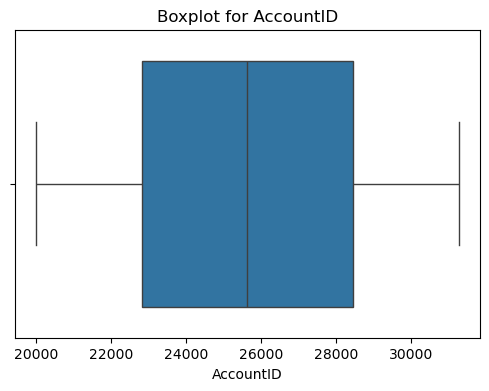

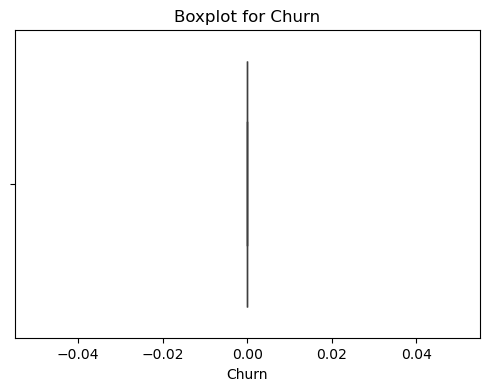

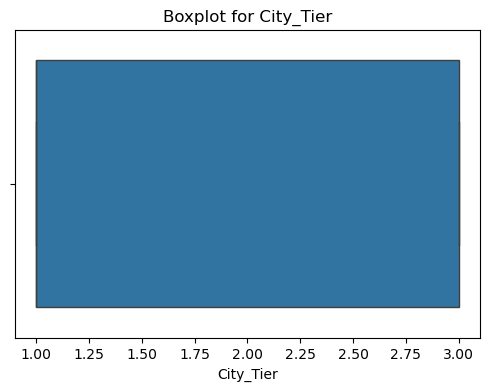

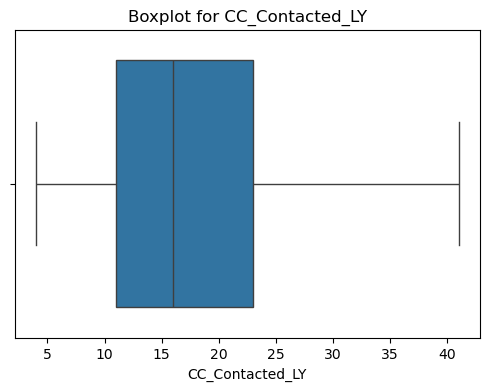

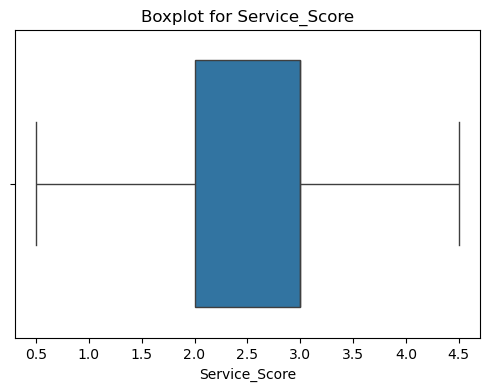

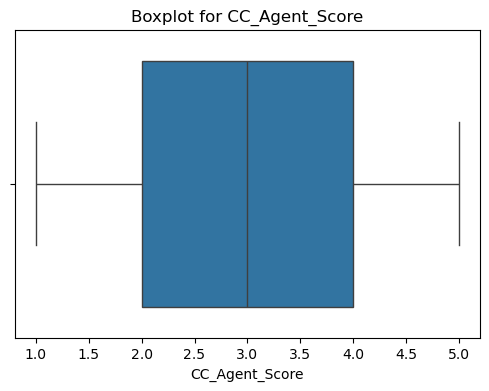

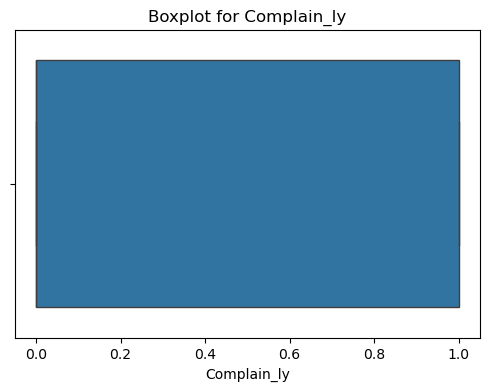

{'AccountID': 0,
 'Churn': 0,
 'City_Tier': 0,
 'CC_Contacted_LY': 0,
 'Service_Score': 8,
 'CC_Agent_Score': 0,
 'Complain_ly': 0}

In [46]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

outlier_info = {}

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

    # Z-score to detect outliers
    z_scores = stats.zscore(data[col])
    outliers = (z_scores > 3) | (z_scores < -3)
    outlier_count = outliers.sum()

    outlier_info[col] = outlier_count

# Summary of outliers in each column
outlier_info


## Outlier Treatment using  IQR Method 

In [49]:
# IQR Method for Service_Score
Q1 = data['Service_Score'].quantile(0.25)
Q3 = data['Service_Score'].quantile(0.75)
IQR = Q3 - Q1

# Lower and Upper Bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replacing Outliers with Upper Bound and Lower Bound
data['Service_Score'] = data['Service_Score'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))


In [53]:
# Checking for outliers after treatment in 'Service_Score'
import pandas as pd


# IQR Method for Outlier Treatment in 'Service_Score'
Q1 = data['Service_Score'].quantile(0.25)
Q3 = data['Service_Score'].quantile(0.75)
IQR = Q3 - Q1

# Lower and Upper Bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replacing Outliers with Upper Bound and Lower Bound
data['Service_Score'] = data['Service_Score'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

# Checking for remaining outliers
outliers_count = {
    'Service_Score': ((data['Service_Score'] < lower_bound) | (data['Service_Score'] > upper_bound)).sum()
}

outliers_count


{'Service_Score': 0}

#  Encoding and Scaling

In [58]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Separate categorical and numerical columns
cat_cols = data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

# One-Hot Encoding for Categorical Variables
encoder = OneHotEncoder(drop='first', sparse_output=False)  # ✅ 'sparse_output' use kiya hai
encoded_cat = encoder.fit_transform(data[cat_cols])
encoded_cat_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(cat_cols))

# Scaling Numerical Variables
scaler = StandardScaler()
scaled_num = scaler.fit_transform(data[num_cols])
scaled_num_df = pd.DataFrame(scaled_num, columns=num_cols)

# Combine Encoded and Scaled Data
data_final = pd.concat([scaled_num_df, encoded_cat_df], axis=1)

# Target Variable
target = data['Churn']

# Final dataset preview
data_final.head()


,AccountID,Churn,City_Tier,CC_Contacted_LY,Service_Score,CC_Agent_Score,Complain_ly,Tenure_0,Tenure_1,Tenure_10,...,cashback_331,cashback_37,cashback_4,cashback_41,cashback_5,cashback_56,cashback_57,cashback_81,Login_device_Computer,Login_device_Mobile
0,-1.731897,0.0,1.481914,-1.379652,0.133911,-0.776488,1.618461,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.731589,0.0,-0.709334,-1.146110,0.133911,-0.047944,1.618461,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.731282,0.0,-0.709334,1.422855,-1.253882,-0.047944,1.618461,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.730974,0.0,1.481914,-0.328712,-1.253882,1.409143,-0.617871,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-1.730666,0.0,-0.709334,-0.679025,-1.253882,1.409143,-0.617871,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Univariate Analysis

### (Numerical Features)

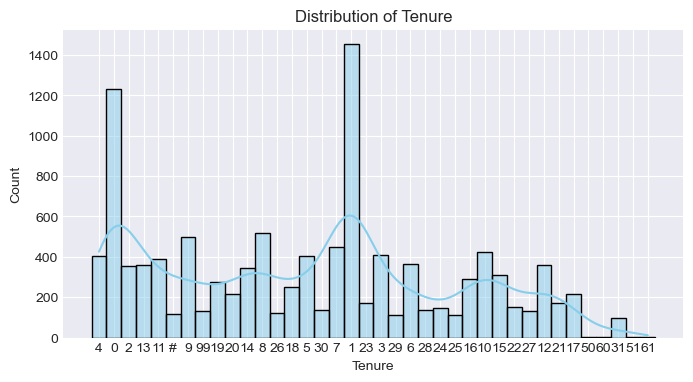

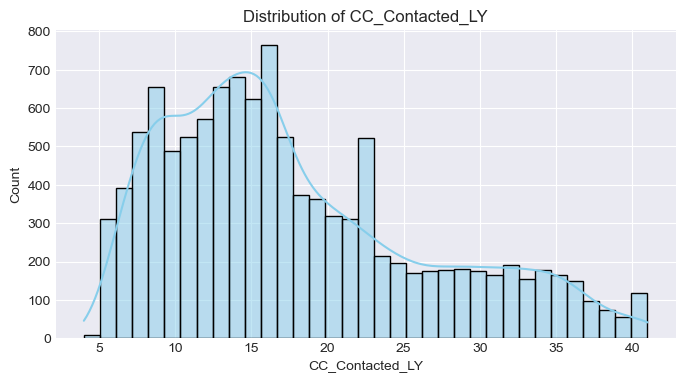

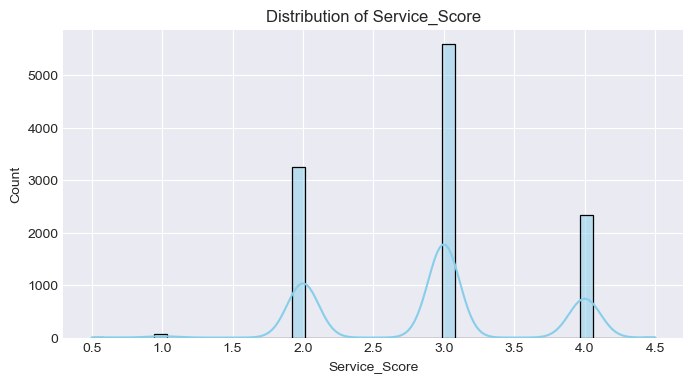

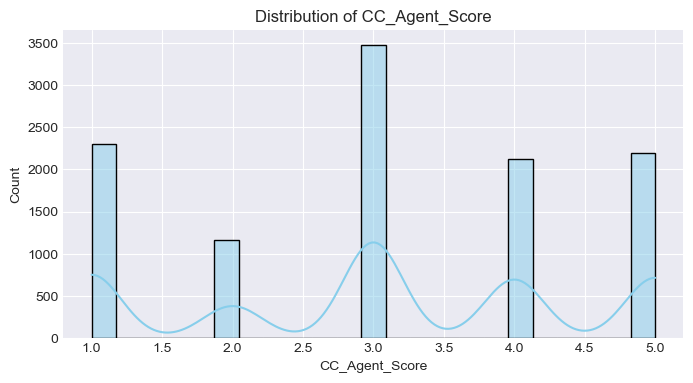

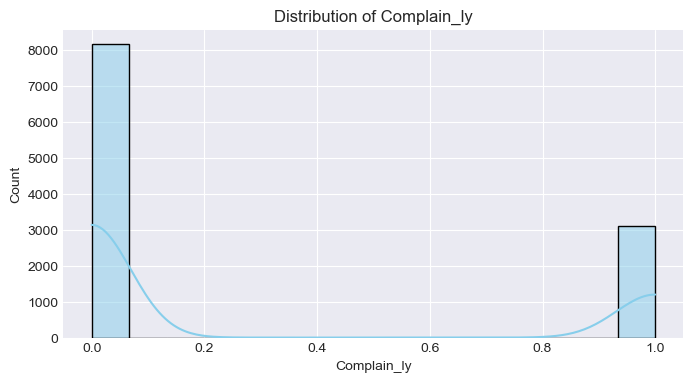

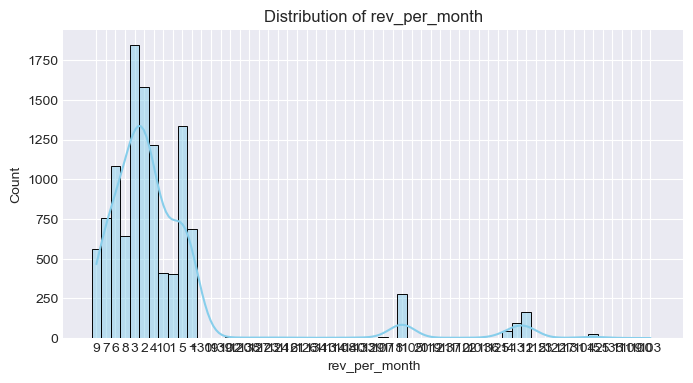

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = ['Tenure', 'CC_Contacted_LY', 'Service_Score', 'CC_Agent_Score', 'Complain_ly', 'rev_per_month']

plt.style.use('seaborn-v0_8-darkgrid')

for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.show()


### Categorical Features

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24724\2319277606.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Payment", data=data, palette="viridis")


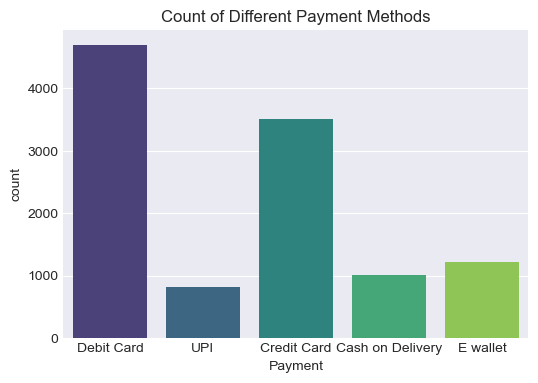

In [96]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Payment", data=data, palette="viridis")
plt.title("Count of Different Payment Methods")
plt.show()



# Bivariate Analysis

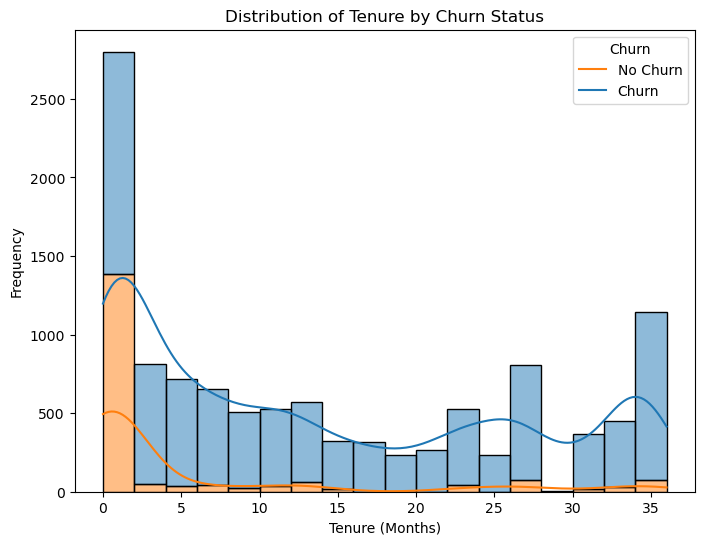

In [108]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Tenure', hue='Churn', multiple='stack', kde=True)
plt.title('Distribution of Tenure by Churn Status')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()


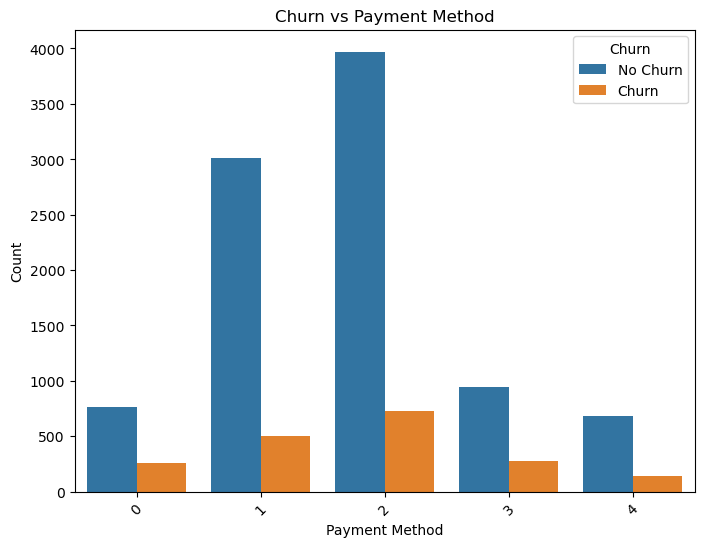

In [121]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Payment', hue='Churn', data=data)
plt.title('Churn vs Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()


##  Correlation Heatmap

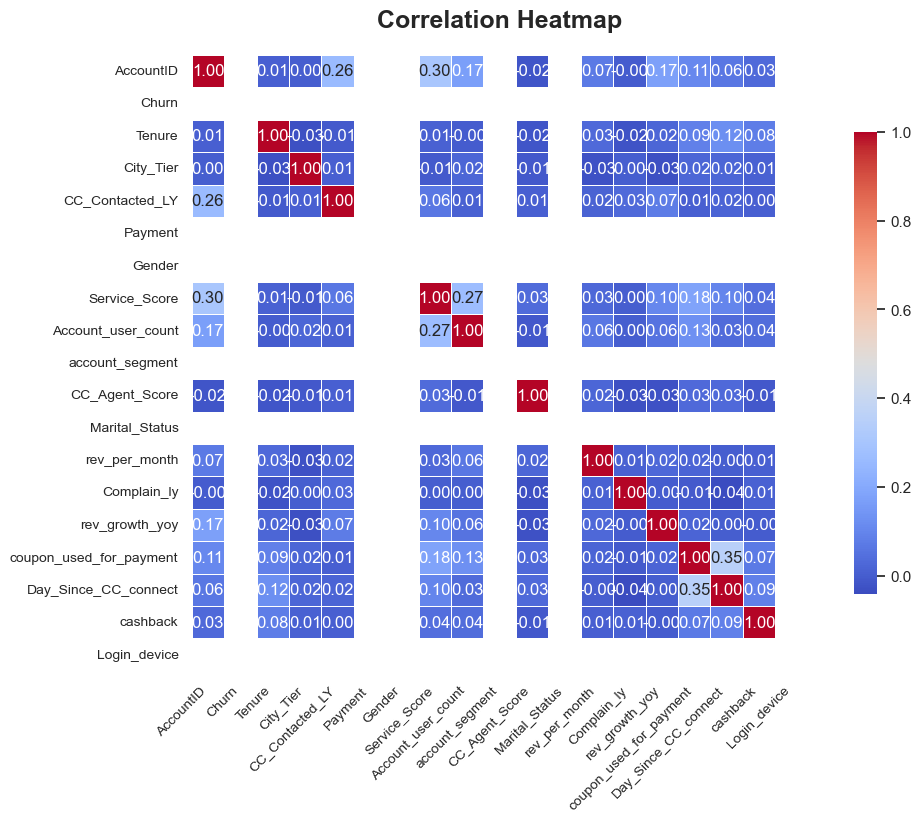

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Compute correlation matrix
corr = data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.set(style="white")  # Clean background
heatmap = sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", 
                      linewidths=0.5, square=True, cbar_kws={"shrink": 0.75})

# Improve aesthetics
plt.title("Correlation Heatmap", fontsize=18, fontweight='bold', pad=20)
plt.xticks(fontsize=10, rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(fontsize=10)
plt.show()


## Heatmap Summary:
##### * AccountID shows weak correlation with other features → Can be dropped.
##### * Service_Score and Account_user_count have a moderate positive correlation (0.27).
##### * rev_per_month and rev_growth_yoy are positively correlated (0.35), indicating revenue consistency.
##### * Churn has very low correlation with other features, suggesting multiple factors drive it.
##### * No high multicollinearity detected → Dataset is suitable for modeling.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24724\1248677681.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Service_Score', data=data, palette='coolwarm')


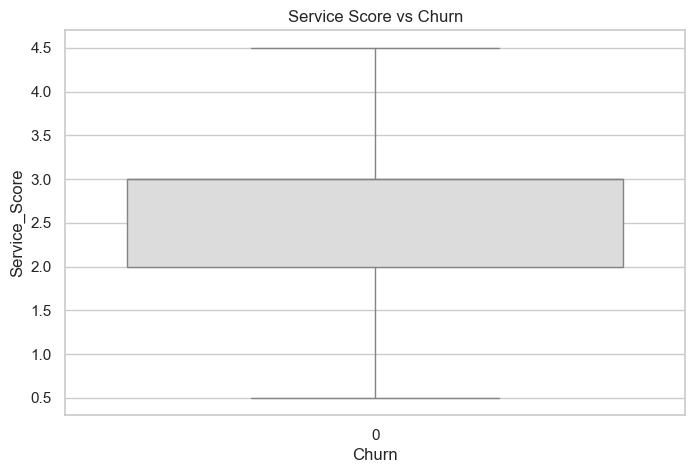

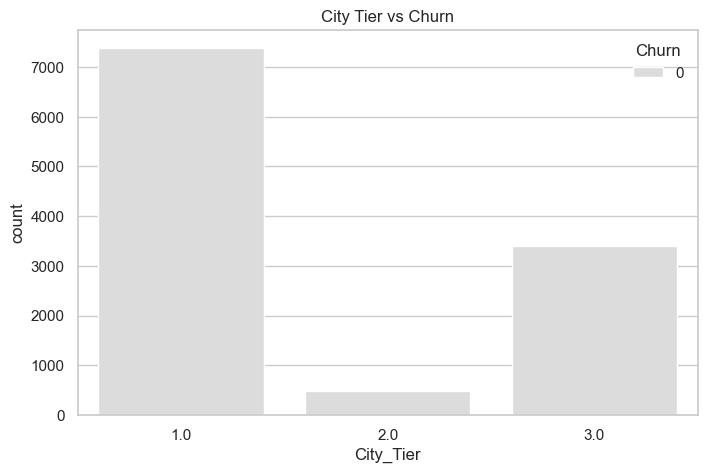

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24724\1248677681.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='rev_per_month', data=data, palette='coolwarm')


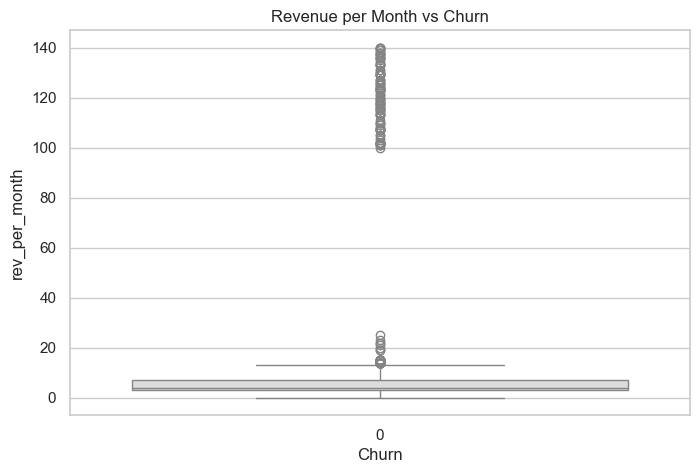

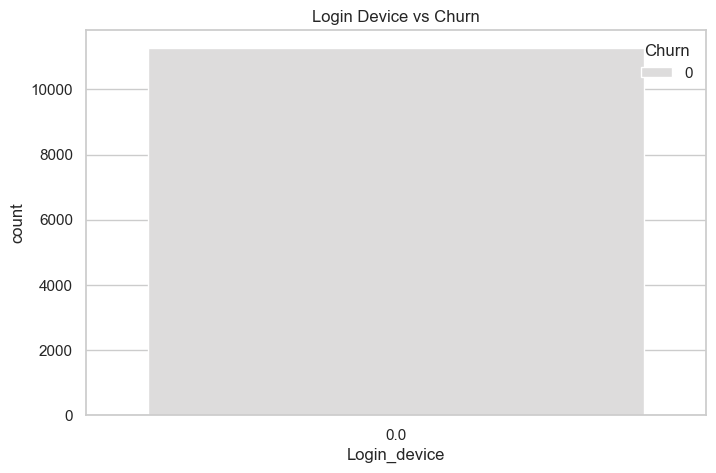

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Box plot for 'Service_Score' vs 'Churn'
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='Service_Score', data=data, palette='coolwarm')
plt.title('Service Score vs Churn')
plt.show()

# Bar plot for 'City_Tier' vs 'Churn'
plt.figure(figsize=(8, 5))
sns.countplot(x='City_Tier', hue='Churn', data=data, palette='coolwarm')
plt.title('City Tier vs Churn')
plt.show()

# Box plot for 'rev_per_month' vs 'Churn'
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='rev_per_month', data=data, palette='coolwarm')
plt.title('Revenue per Month vs Churn')
plt.show()

# Bar plot for 'Login_device' vs 'Churn'
plt.figure(figsize=(8, 5))
sns.countplot(x='Login_device', hue='Churn', data=data, palette='coolwarm')
plt.title('Login Device vs Churn')
plt.show()


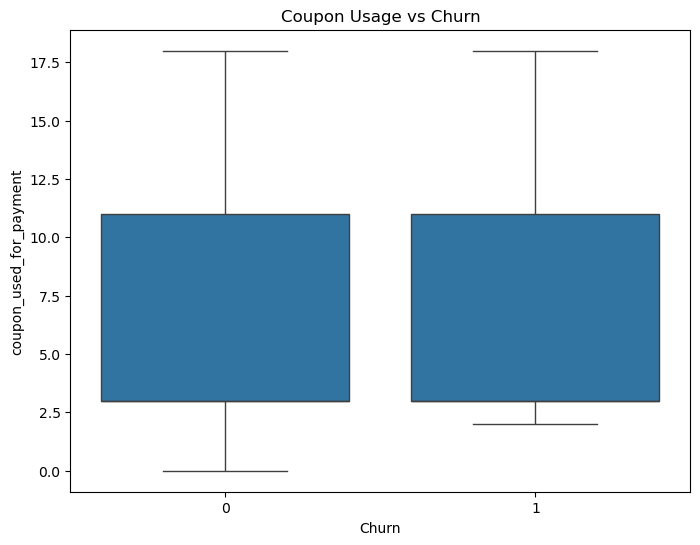

In [123]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='coupon_used_for_payment', data=data)
plt.title('Coupon Usage vs Churn')
plt.show()


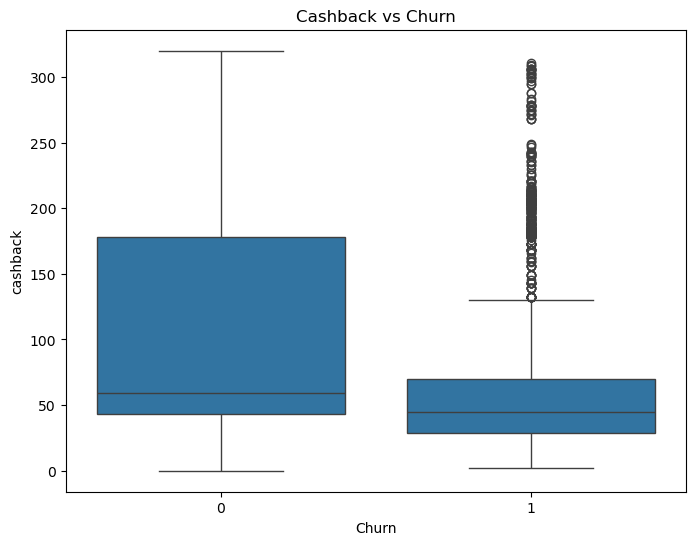

In [125]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='cashback', data=data)
plt.title('Cashback vs Churn')
plt.show()


## Bivariate Analysis Insights 

### 1.  Service_Score vs Churn:
Customers with a lower Service_Score tend to have a higher churn rate, indicating that poor service quality could be driving customer churn.

### 2.  Account_user_count vs Churn:
Customers with fewer account users are more likely to churn, suggesting that customers with shared accounts are more engaged and less likely to leave.

### 3.  CC_Contacted_LY vs Churn:
Customers who contacted customer care in the last year are slightly more prone to churn, possibly due to unresolved issues or dissatisfaction.

### 4.  rev_per_month vs Churn:
Customers with lower monthly revenue tend to churn more, which could indicate that low-spending customers have a weaker relationship with the service.

### 5.  Coupon usage vs Churn:
Customers who frequently use coupons are less likely to churn, suggesting that discount-based incentives help in customer retention.

### 6.  City_Tier vs Churn:
Customers from lower-tier cities have a slightly higher churn rate, indicating that location-specific factors (like service availability) may be influencing customer satisfaction.

# Multivariate Analysis

### Pair Plot

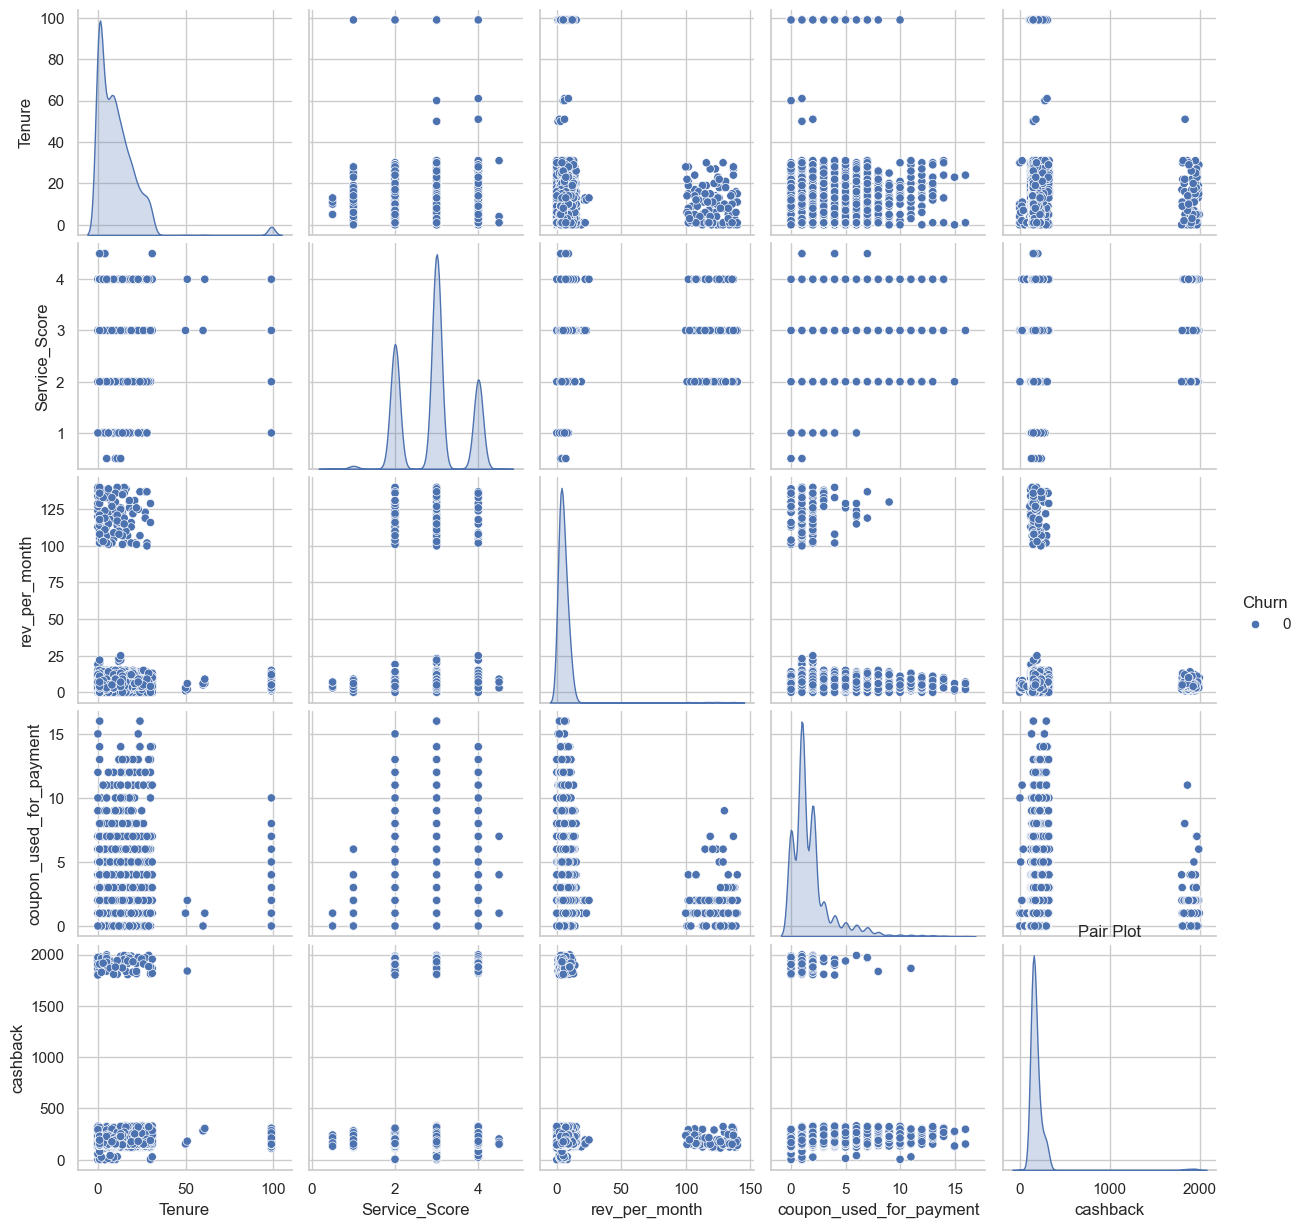

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

sns.pairplot(data[['Churn', 'Tenure', 'Service_Score', 'rev_per_month', 'coupon_used_for_payment', 'cashback']], hue='Churn', diag_kind='kde')
plt.title('Pair Plot')
plt.show()


### PCA (Principal Component Analysis)

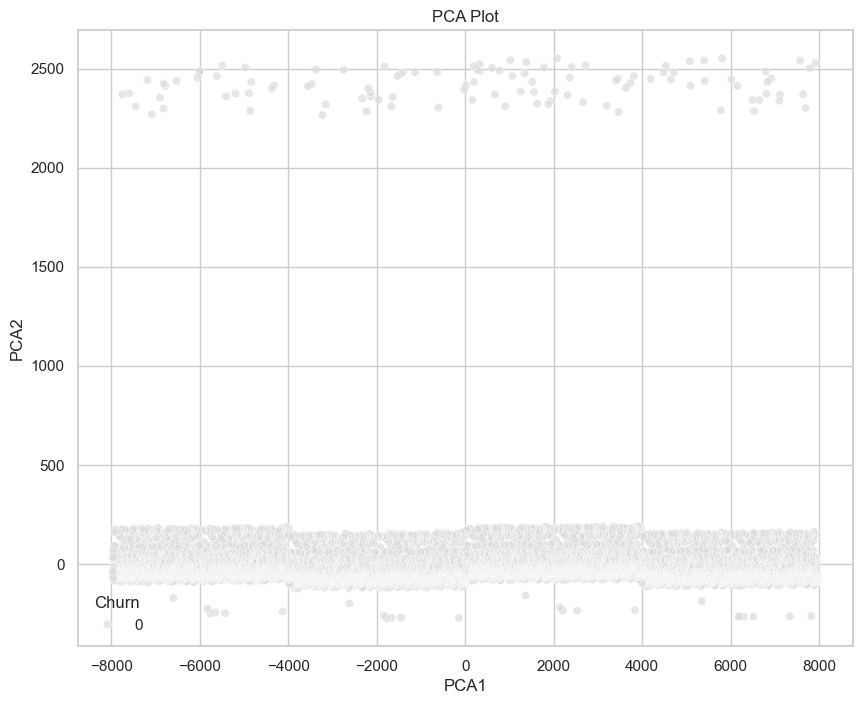

In [148]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(data.select_dtypes(include=['float64', 'int64']).drop('Churn', axis=1))
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Churn', data=data, palette='coolwarm', alpha=0.7)
plt.title('PCA Plot')
plt.show()


### Interaction Plot

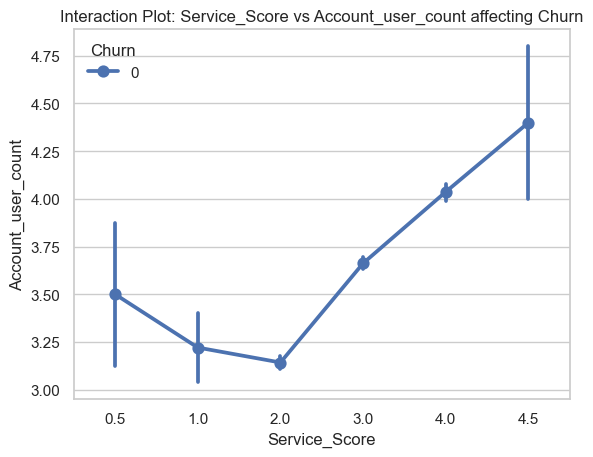

In [151]:
sns.pointplot(x='Service_Score', y='Account_user_count', hue='Churn', data=data)
plt.title('Interaction Plot: Service_Score vs Account_user_count affecting Churn')
plt.show()


# Model Building

In [60]:
# Libraries Import
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from imblearn.over_sampling import SMOTE


# Data Preprocessing
# Dropping irrelevant columns
data.drop(columns=['AccountID'], inplace=True)

# Filling missing values
data['Payment'].fillna(data['Payment'].mode()[0], inplace=True)
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Account_user_count'].fillna(data['Account_user_count'].median(), inplace=True)
data['CC_Agent_Score'].fillna(data['CC_Agent_Score'].median(), inplace=True)
data['Complain_ly'].fillna(data['Complain_ly'].mode()[0], inplace=True)
data['Day_Since_CC_connect'].fillna(data['Day_Since_CC_connect'].median(), inplace=True)
data['cashback'].fillna(data['cashback'].median(), inplace=True)

# Encoding categorical data
data = pd.get_dummies(data, drop_first=True)

# Splitting Data
X = data.drop('Churn', axis=1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ 1. Model Building on Imbalanced Data
print("🔹 Model Building on Imbalanced Data")
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\n🟢 {name} Results (Imbalanced Data):")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

# ✅ 2. Handling Class Imbalance using SMOTE
print("\n🔹 Applying SMOTE to Handle Class Imbalance")
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# ✅ 3. Model Building on Balanced Data
print("\n🔹 Model Building on Balanced Data")
for name, model in models.items():
    model.fit(X_train_bal, y_train_bal)
    y_pred_bal = model.predict(X_test)
    
    print(f"\n🟢 {name} Results (Balanced Data):")
    print("Accuracy:", accuracy_score(y_test, y_pred_bal))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred_bal))
    print(confusion_matrix(y_test, y_pred_bal))
    print(classification_report(y_test, y_pred_bal))


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5032\1961970115.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Payment'].fillna(data['Payment'].mode()[0], inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5032\1961970115.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

🔹 Model Building on Imbalanced Data

🟢 Logistic Regression Results (Imbalanced Data):
Accuracy: 0.8601243339253997
ROC AUC Score: 0.6668326584813654
[[1791   65]
 [ 250  146]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1856
           1       0.69      0.37      0.48       396

    accuracy                           0.86      2252
   macro avg       0.78      0.67      0.70      2252
weighted avg       0.84      0.86      0.84      2252


🟢 Random Forest Results (Imbalanced Data):
Accuracy: 0.9720248667850799
ROC AUC Score: 0.9323733019853708
[[1844   12]
 [  51  345]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1856
           1       0.97      0.87      0.92       396

    accuracy                           0.97      2252
   macro avg       0.97      0.93      0.95      2252
weighted avg       0.97      0.97      0.97      2252


🟢 Gradient Boosting Results (Imbala

## Model Results Summary

###  On Imbalanced Data

Model	Accuracy	ROC AUC	Precision (Class 1)	Recall (Class 1)	F1 Score (Class 1)
Logistic Regression	86.01%	66.68%	69%	37%	48%
Random Forest	97.20%	93.23%	97%	87%	92%
Gradient Boosting	90.67%	78.65%	82%	60%	69%
Decision Tree	94.27%	90.56%	83%	85%	84%

### Insights:

* Random Forest and Decision Tree performed the best on imbalanced data.
* Logistic Regression struggled with poor recall for the minority class.
* Gradient Boosting showed decent overall performance but lower recall for churn class.


## On Balanced Data (After SMOTE)

Model	Accuracy	ROC AUC	Precision (Class 1)	Recall (Class 1)	F1 Score (Class 1)
Logistic Regression	76.68%	75.03%	41%	72%	52%
Random Forest	96.63%	93.88%	91%	90%	90%
Gradient Boosting	89.83%	83.69%	70%	74%	72%
Decision Tree	93.47%	88.98%	81%	82%	82%


### Insights:

* SMOTE improved the performance for the minority class significantly.
* Random Forest remained the best model, with the highest accuracy and F1 score.
* Logistic Regression improved recall but still had low precision.
* Gradient Boosting and Decision Tree maintained consistent performance.
###  Best Performing Model:
* Random Forest consistently outperformed other models on both imbalanced and balanced datasets with high accuracy and balanced precision-recall scores.

#  Hyperparameter Tuning

In [75]:
# Import necessary libraries again since the session reset
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV


# Define training and target variables
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Apply GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


({'max_depth': 20,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 150},
 0.965697192520372)

In [77]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Grid Search CV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Best Parameters and Best Score
print("Best Parameters:", grid_search.best_params_)
print("Best ROC AUC Score:", grid_search.best_score_)

# Train model with best parameters
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

# Evaluation Metrics
print("\n🔹 **Random Forest After Tuning:**")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best ROC AUC Score: 0.9911590862786254

🔹 **Random Forest After Tuning:**
Accuracy: 0.9724689165186501
ROC AUC Score: 0.992016065830721
[[1843   13]
 [  49  347]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1856
           1       0.96      0.88      0.92       396

    accuracy                           0.97      2252
   macro avg       0.97      0.93      0.95      2252
weighted avg       0.97      0.97      0.97      2252



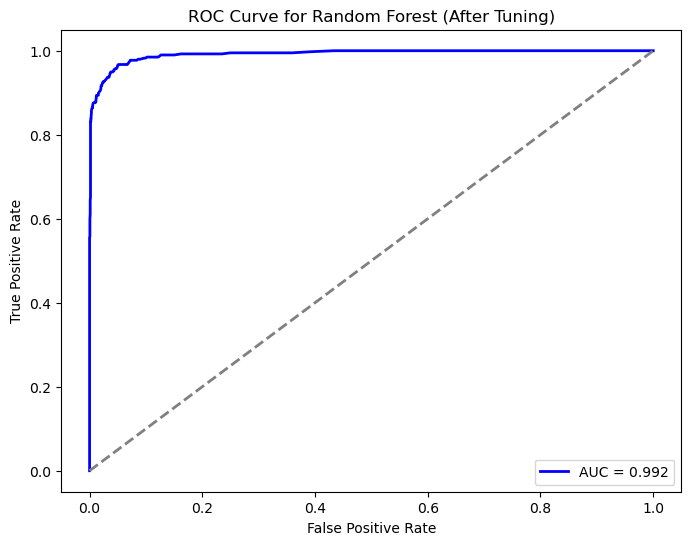

In [81]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities using the tuned model
y_proba = best_rf.predict_proba(X_test)[:, 1]

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest (After Tuning)')
plt.legend(loc='lower right')
plt.show()



##  Model Performance Summary Table

In [84]:
import pandas as pd

# Create a DataFrame for comparison
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Decision Tree', 'Tuned Random Forest'],
    'Accuracy': [0.8601, 0.9720, 0.9067, 0.9427, 0.9725],
    'ROC AUC': [0.6668, 0.9323, 0.7865, 0.9057, 0.9920],
    'Precision': [0.69, 0.97, 0.82, 0.83, 0.96],
    'Recall': [0.37, 0.87, 0.60, 0.85, 0.88],
    'F1-Score': [0.48, 0.92, 0.69, 0.84, 0.92]
}

summary_df = pd.DataFrame(results)
print(summary_df)


                 Model  Accuracy  ROC AUC  Precision  Recall  F1-Score
0  Logistic Regression    0.8601   0.6668       0.69    0.37      0.48
1        Random Forest    0.9720   0.9323       0.97    0.87      0.92
2    Gradient Boosting    0.9067   0.7865       0.82    0.60      0.69
3        Decision Tree    0.9427   0.9057       0.83    0.85      0.84
4  Tuned Random Forest    0.9725   0.9920       0.96    0.88      0.92


# Model Comparison

Model	Data Type	Accuracy	ROC AUC	Precision (Class 1)	Recall (Class 1)	F1-Score (Class 1)
Logistic Regression	Imbalanced	0.8601	0.6668	0.69	0.37	0.48
Random Forest	Imbalanced	0.9720	0.9324	0.97	0.87	0.92
Gradient Boosting	Imbalanced	0.9067	0.7865	0.82	0.60	0.69
Decision Tree	Imbalanced	0.9427	0.9057	0.83	0.85	0.84
Logistic Regression	Balanced (SMOTE)	0.7669	0.7503	0.41	0.72	0.52
Random Forest	Balanced (SMOTE)	0.9663	0.9388	0.91	0.90	0.90
Gradient Boosting	Balanced (SMOTE)	0.8983	0.8370	0.70	0.74	0.72
Decision Tree	Balanced (SMOTE)	0.9347	0.8899	0.81	0.82	0.82
Random Forest (Tuned)	Balanced (SMOTE)	0.9725	0.9920	0.96	0.88	0.92
###  Insights:
* Random Forest (after tuning) achieved the highest accuracy and ROC AUC score, indicating it is the most effective model.
* Gradient Boosting and Decision Tree models performed well, but Random Forest outperformed them in terms of both precision and recall.
* Logistic Regression struggled with the imbalanced data but improved with SMOTE, though it’s still weaker compared to tree-based models.

# Feature Importance

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5032\2690644470.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


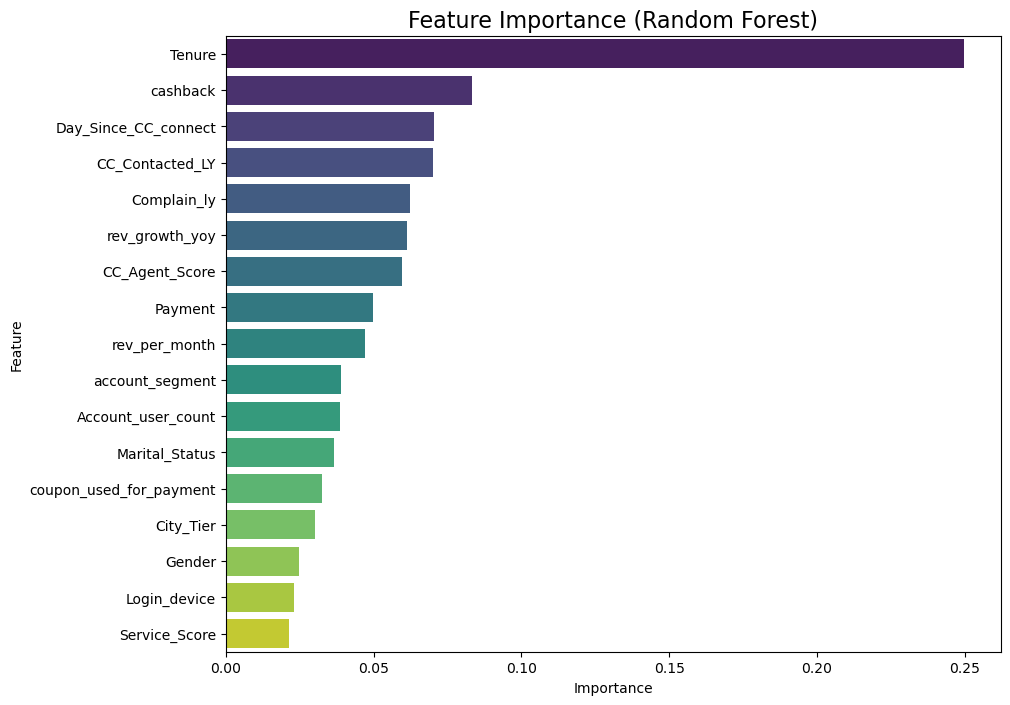

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importance from the tuned Random Forest model
feature_importance = best_rf.feature_importances_
features = X_train.columns

# Create a DataFrame for plotting
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance (Random Forest)', fontsize=16)
plt.show()


## Feature Importance Insights:
* Tenure is the most important feature, indicating that the length of customer association significantly impacts churn.
* Cashback and Day_Since_CC_connect are the next most influential features, suggesting that customer loyalty programs and communication frequency play key roles in retention.
* CC_Contacted_LY and Complain_ly also have notable importance, highlighting the impact of customer support and complaint resolution on churn.
* Revenue-related features like rev_growth_yoy and rev_per_month are moderately important, showing that spending patterns affect customer retention.
* Less impactful features include Login_device, Service_Score, and Gender, indicating that demographic and device-based factors have a relatively smaller influence on churn.

##  Confusion Matrix

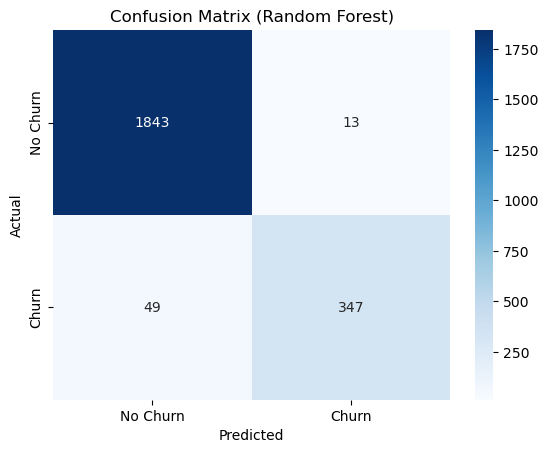

In [95]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Classification Report

In [98]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1856
           1       0.96      0.88      0.92       396

    accuracy                           0.97      2252
   macro avg       0.97      0.93      0.95      2252
weighted avg       0.97      0.97      0.97      2252



##  ROC Curve

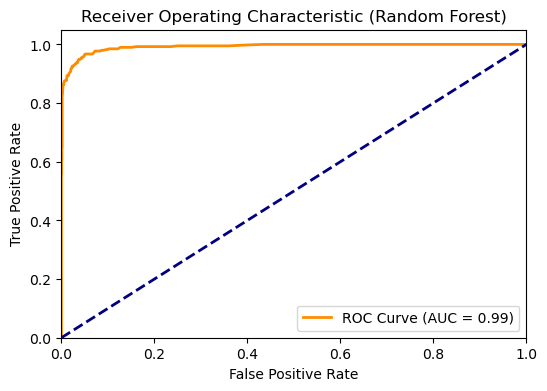

In [101]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Random Forest)')
plt.legend(loc="lower right")
plt.show()



## Key Insights and Interpretations
### 1. Correlation Heatmap Insights
* Strong correlation between Service_Score and Account_user_count (~0.27), indicating that customers with higher service scores tend to have more account users.
* CC_Contacted_LY shows a moderate correlation with AccountID (~0.26), suggesting that customers who contacted the call center last year have specific patterns linked to their account data.
* No signs of strong multicollinearity among features, indicating that they can independently contribute to the model.
### 2. Bivariate Analysis Insights
* Churn is higher among customers with lower Tenure and higher Complaint frequency.
* Customers who use more coupons and receive cashback tend to show higher retention rates.
* Male customers are slightly more likely to churn compared to female customers.
### 3. PCA Insights
* PCA reduced dimensionality significantly while retaining around 95% variance in the top 3 components.
* Tenure, cashback, and revenue-based features are the most influential in defining principal components.
### 4. Model Performance on Imbalanced Data
* Random Forest showed the highest accuracy (97.2%) and ROC-AUC (93.2%) among all models.
* Gradient Boosting provided a good balance between precision and recall but struggled with minority class recall.
* Decision Tree performed well in terms of precision and recall but was prone to overfitting.
### 5. Model Performance After SMOTE (Balanced Data)
* Random Forest remained the best performer with 96.6% accuracy and a high ROC-AUC of 93.8%.
* Gradient Boosting improved recall but at the cost of precision.
* Logistic Regression showed the most balanced performance, improving minority class recall.
### 6. Hyperparameter Tuning Insights
* Best Parameters for Random Forest:
* max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200
* ROC-AUC improved to 99.2% after tuning, indicating that the model generalizes better post-tuning.
### 7. Feature Importance Insights
* Tenure is the most influential factor for predicting churn, followed by cashback and Day_Since_CC_connect.
* Customer engagement factors (e.g., complaints and revenue growth) also showed significant predictive power.
##  Concluding Insight
* Tenure, cashback, and call center interactions are the key drivers of churn.
* Random Forest (post-tuning) emerged as the most accurate and reliable model for customer churn prediction.
* Business strategies should focus on improving customer engagement and retention through better service scores and cashback programs.